In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

### Data loading and cleaning

In [287]:
# loading data
churnData = pd.read_csv("DATA_Customer-Churn.csv")

In [288]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [289]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [290]:
# converting TotalCharges from object to numeric
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [291]:
# checking for null values
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [292]:
# dropping the null values
churnData.dropna(inplace=True)

In [293]:
churnData['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [294]:
# converting Churn into binary
churnData['Churn'] = list(map(lambda x:0 if x=='No' else 1, churnData['Churn']))

### Modelling

In [295]:
# X, y split with only tenure, SeniorCitizen, MonthlyCharges and TotalCharges
X = churnData[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]
y = churnData['Churn']

In [296]:
# splitting train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

,Error_metric,Train,Test
0,Accuracy,0.80,0.77
1,Precision,0.66,0.63
2,Recall,0.46,0.45


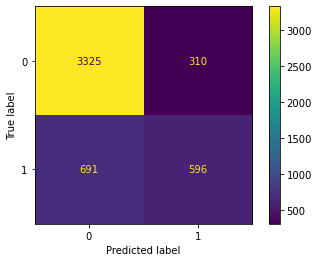

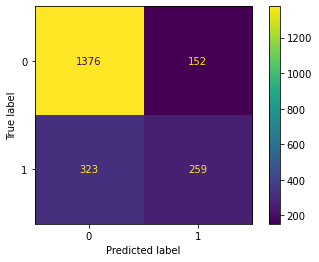

In [297]:
# modelling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler().fit(X_train)

X_train_mod = std_scaler.transform(X_train)
X_test_mod  = std_scaler.transform(X_test)

log = LogisticRegression() 

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

### KNN

In [298]:
from sklearn.neighbors import KNeighborsClassifier

# initialize model (set parameters)
neigh = KNeighborsClassifier(n_neighbors=10)

In [299]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [300]:
y_pred_train_knn = neigh.predict(X_train)
y_pred_test_knn  = neigh.predict(X_test)

In [301]:
# for loop to try many values of k

full = pd.DataFrame()

models = {'k': [] }

for k in range(2,21):

    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)

    models['k'] = [k, neigh]

    y_pred_train_knn = neigh.predict(X_train)
    y_pred_test_knn  = neigh.predict(X_test)

    performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
    temp = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})
    full = pd.concat([full,temp], axis=0)

full

,Error_metric,Train,Test
0,Accuracy,0.80,0.77
1,Precision,0.66,0.63
2,Recall,0.46,0.45
0,Accuracy,0.80,0.77
1,Precision,0.66,0.63
2,Recall,0.46,0.45
0,Accuracy,0.80,0.77
1,Precision,0.66,0.63
2,Recall,0.46,0.45
0,Accuracy,0.80,0.77


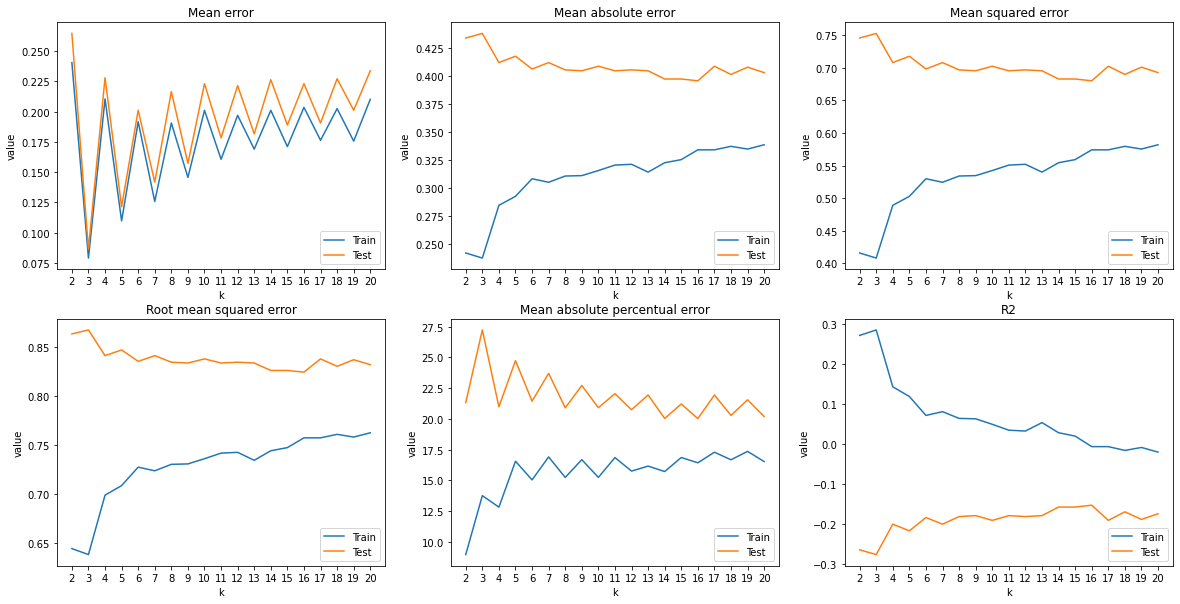

In [302]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#metrics = ['Mean error',]'Mean absolute error',...]

fig, ax = plt.subplots(2,3, figsize=(20,10))
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean error'], hue = 'variable', ax = ax[0,0])
ax[0,0].set_xticks(range(2,21))
ax[0,0].set_title("Mean error")
ax[0,0].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean absolute error'], hue = 'variable', ax = ax[0,1])
ax[0,1].set_xticks(range(2,21))
ax[0,1].set_title("Mean absolute error")
ax[0,1].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean squared error'], hue = 'variable', ax = ax[0,2])
ax[0,2].set_xticks(range(2,21))
ax[0,2].set_title("Mean squared error")
ax[0,2].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Root mean squared error'], hue = 'variable', ax = ax[1,0])
ax[1,0].set_xticks(range(2,21))
ax[1,0].set_title("Root mean squared error")
ax[1,0].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean absolute percentual error'], hue = 'variable', ax = ax[1,1])
ax[1,1].set_xticks(range(2,21))
ax[1,1].set_title("Mean absolute percentual error")
ax[1,1].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'R2'], hue = 'variable', ax = ax[1,2])
ax[1,2].set_xticks(range(2,21))
ax[1,2].set_title("R2")
ax[1,2].legend(loc='lower right')

### Decision trees - with only numerical features

,Error_metric,Train,Test
0,Accuracy,0.79,0.77
1,Precision,0.66,0.64
2,Recall,0.40,0.40


Confusion matrix for the train set
[[3363  766]
 [ 272  521]]


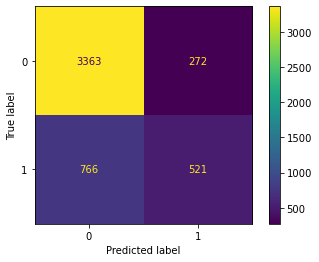



Confusion matrix for the test set
[[1400  350]
 [ 128  232]]


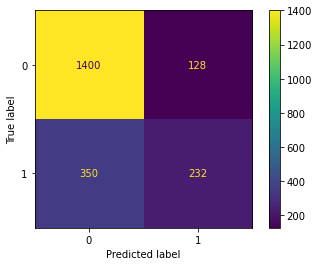

In [303]:
# Modelling
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

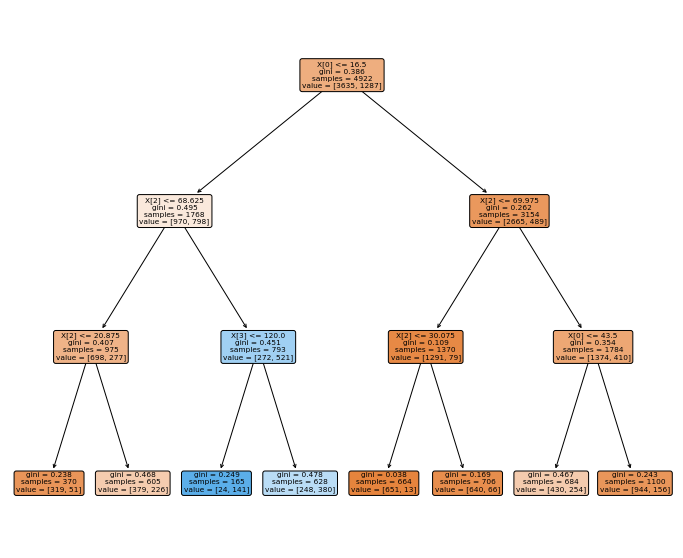

In [304]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,10))

plot_tree(dt,filled = True, rounded=True)
plt.show() 

In [305]:
# checking performance of differnt max_depth

full = pd.DataFrame()

for i in range(1,10):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train)

    y_pred_train_dt = dt.predict(X_train)
    y_pred_test_dt = dt.predict(X_test)


    temp = pd.DataFrame({'Max_depth':i,
                                    'Error_metric': ['Accuracy','Precision','Recall'],
                                   'Train': [accuracy_score(y_train, y_pred_train_dt),
                                             precision_score(y_train, y_pred_train_dt),
                                             recall_score(y_train, y_pred_train_dt)],
                                   'Test': [accuracy_score(y_test, y_pred_test_dt),
                                            precision_score(y_test, y_pred_test_dt),
                                            recall_score(y_test, y_pred_test_dt)]})
    full = pd.concat([full,temp], axis=0)

display(full)

C:\Users\Bosco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bosco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Max_depth,Error_metric,Train,Test
0,1,Accuracy,0.74,0.72
1,1,Precision,0.00,0.00
2,1,Recall,0.00,0.00
0,2,Accuracy,0.79,0.77
1,2,Precision,0.66,0.64
2,2,Recall,0.40,0.40
0,3,Accuracy,0.79,0.77
1,3,Precision,0.66,0.64
2,3,Recall,0.40,0.40
0,4,Accuracy,0.79,0.76


### Decision trees with all features

In [306]:
# getting only numerical features
numericals = churnData._get_numeric_data().drop(columns='Churn')
numericals.reset_index(inplace=True)

In [307]:
# getting only categorical features
categoricals = churnData.select_dtypes('object')
categoricals

,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract
0,Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month
1,Male,No,No,Yes,Yes,No,Yes,No,No,No,One year
2,Male,No,No,Yes,Yes,Yes,No,No,No,No,Month-to-month
3,Male,No,No,No,Yes,No,Yes,Yes,No,No,One year
4,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month
...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year
7039,Female,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year
7040,Female,Yes,Yes,No,Yes,No,No,No,No,No,Month-to-month
7041,Male,Yes,No,Yes,No,No,No,No,No,No,Month-to-month


In [308]:
categoricals.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract'],
      dtype='object')

In [309]:
for col_name in categoricals.columns :
    print(categoricals[str(col_name)].value_counts().index)
    print()

Index(['Male', 'Female'], dtype='object')

Index(['No', 'Yes'], dtype='object')

Index(['No', 'Yes'], dtype='object')

Index(['Yes', 'No'], dtype='object')

Index(['No', 'Yes', 'No internet service'], dtype='object')

Index(['No', 'Yes', 'No internet service'], dtype='object')

Index(['No', 'Yes', 'No internet service'], dtype='object')

Index(['No', 'Yes', 'No internet service'], dtype='object')

Index(['No', 'Yes', 'No internet service'], dtype='object')

Index(['No', 'Yes', 'No internet service'], dtype='object')

Index(['Month-to-month', 'Two year', 'One year'], dtype='object')



In [310]:
from sklearn.preprocessing import OrdinalEncoder

categories = [['Male', 'Female'], ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes'], ['No internet service', 'No', 'Yes'], ['No internet service', 'No', 'Yes'], ['No internet service', 'No', 'Yes'], ['No internet service', 'No', 'Yes'], ['No internet service', 'No', 'Yes'], ['No internet service', 'No', 'Yes'], ['Month-to-month', 'One year', 'Two year']] 
ordinal_encoder = OrdinalEncoder(categories=categories)
categoricals_encoded = pd.DataFrame(ordinal_encoder.fit_transform(categoricals),
                                 columns=categoricals.columns)

In [311]:
categoricals_encoded

,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract
0,1.00,1.00,0.00,0.00,1.00,2.00,1.00,1.00,1.00,1.00,0.00
1,0.00,0.00,0.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,1.00
2,0.00,0.00,0.00,1.00,2.00,2.00,1.00,1.00,1.00,1.00,0.00
3,0.00,0.00,0.00,0.00,2.00,1.00,2.00,2.00,1.00,1.00,1.00
4,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
7027,0.00,1.00,1.00,1.00,2.00,1.00,2.00,2.00,2.00,2.00,1.00
7028,1.00,1.00,1.00,1.00,1.00,2.00,2.00,1.00,2.00,2.00,1.00
7029,1.00,1.00,1.00,0.00,2.00,1.00,1.00,1.00,1.00,1.00,0.00
7030,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


In [312]:
# combining numericals and categoricals
all_features = pd.concat([numericals, categoricals_encoded], axis=1)

In [313]:
# X, y split including categorical columns
X = all_features
y = churnData['Churn']

,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.68,0.66
2,Recall,0.39,0.38


Confusion matrix for the train set
[[3398  789]
 [ 237  498]]


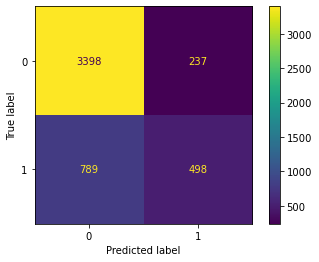



Confusion matrix for the test set
[[1416  360]
 [ 112  222]]


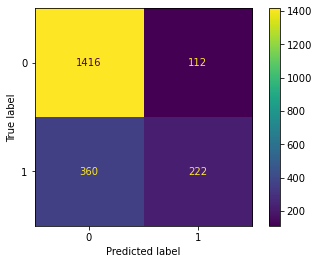

In [314]:
# Modelling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

In [315]:
# checking performance of differnt max_depth

full = pd.DataFrame()

for i in range(1,10):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train)

    y_pred_train_dt = dt.predict(X_train)
    y_pred_test_dt = dt.predict(X_test)


    temp = pd.DataFrame({'Max_depth':i,
                                    'Error_metric': ['Accuracy','Precision','Recall'],
                                   'Train': [accuracy_score(y_train, y_pred_train_dt),
                                             precision_score(y_train, y_pred_train_dt),
                                             recall_score(y_train, y_pred_train_dt)],
                                   'Test': [accuracy_score(y_test, y_pred_test_dt),
                                            precision_score(y_test, y_pred_test_dt),
                                            recall_score(y_test, y_pred_test_dt)]})
    full = pd.concat([full,temp], axis=0)

display(full)

C:\Users\Bosco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bosco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Max_depth,Error_metric,Train,Test
0,1,Accuracy,0.74,0.72
1,1,Precision,0.00,0.00
2,1,Recall,0.00,0.00
0,2,Accuracy,0.76,0.74
1,2,Precision,0.53,0.52
2,2,Recall,0.63,0.60
0,3,Accuracy,0.79,0.78
1,3,Precision,0.68,0.66
2,3,Recall,0.39,0.38
0,4,Accuracy,0.79,0.78
